In [40]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:

20640

##### Number of Attributes:

8 numeric, predictive attributes and the target

##### Attribute Information:

* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [43]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [44]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
X_valid.shape

(3870, 8)

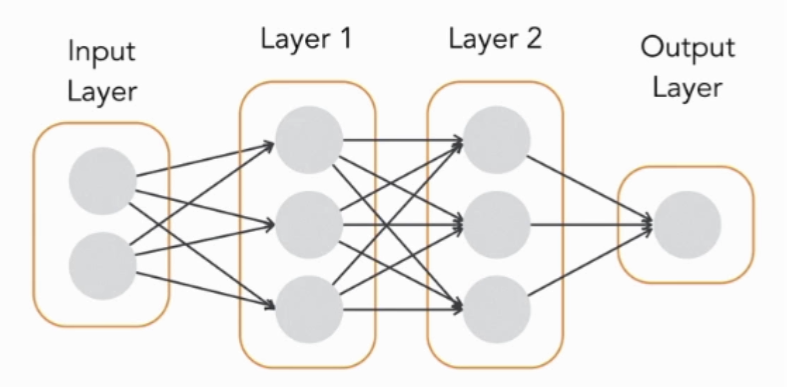

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3891 - mae: 0.4459 - val_loss: 0.3970 - val_mae: 0.4330
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3864 - mae: 0.4436 - val_loss: 0.4213 - val_mae: 0.4374
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3841 - mae: 0.4430 - val_loss: 0.4095 - val_mae: 0.4310
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3816 - mae: 0.4406 - val_loss: 0.4092 - val_mae: 0.4334
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3799 - mae: 0.4397 - val_loss: 0.3851 - val_mae: 0.4279
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3776 - mae: 0.4382 - val_loss: 0.4133 - val_mae: 0.4287
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3761 - mae: 0.4370 - val_loss: 0.3952 - val_mae: 0.4271
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3886 - mae: 0.4463


In [ ]:
model_history.history

{'loss': [0.38906052708625793,
  0.3864192068576813,
  0.38413116335868835,
  0.381632924079895,
  0.3798585534095764,
  0.37755537033081055,
  0.37607628107070923,
  0.37429505586624146,
  0.37267470359802246,
  0.3712061643600464,
  0.37009942531585693,
  0.36849096417427063,
  0.367335706949234,
  0.36613911390304565,
  0.36509835720062256,
  0.3640924394130707,
  0.3629774749279022,
  0.3622972071170807,
  0.3611534535884857,
  0.36042332649230957],
 'mae': [0.44592297077178955,
  0.4435577094554901,
  0.44303813576698303,
  0.4406306743621826,
  0.4397459626197815,
  0.43824338912963867,
  0.43703770637512207,
  0.4361136853694916,
  0.4355356991291046,
  0.4340897798538208,
  0.4329864978790283,
  0.432107150554657,
  0.4312203824520111,
  0.43027761578559875,
  0.42992717027664185,
  0.42939701676368713,
  0.4285866320133209,
  0.4280936121940613,
  0.4268505871295929,
  0.4265193045139313],
 'val_loss': [0.3970046043395996,
  0.4212810695171356,
  0.4094599485397339,
  0.409177

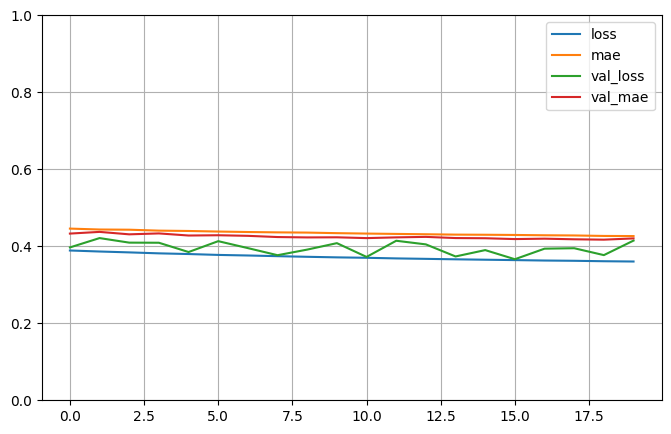

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [48]:
X_new = X_test[:3]

In [ ]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 70ms/step
[[0.6600146]
 [1.6772463]
 [3.9716606]]
[0.477   0.458   5.00001]


In [ ]:
del model

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

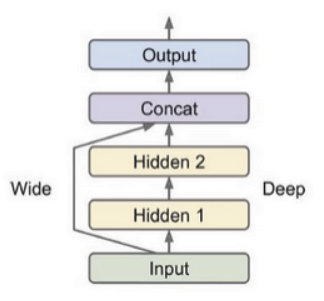

In [57]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [61]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [62]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 2s 3ms/step - loss: 2.2534 - mae: 1.0867 - val_loss: 2.6904 - val_mae: 0.6364
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6992 - mae: 0.6030 - val_loss: 0.8942 - val_mae: 0.5835
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6220 - mae: 0.5780 - val_loss: 0.7284 - val_mae: 0.5563
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5811 - mae: 0.5568 - val_loss: 0.5612 - val_mae: 0.5378
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5493 - mae: 0.5394 - val_loss: 0.5076 - val_mae: 0.5163
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5224 - mae: 0.5250 - val_loss: 0.5224 - val_mae: 0.5063
Epoch 7/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5023 - mae: 0.5129 - val_loss: 0.5139 - val_mae: 0.4961
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [21]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 2ms/step - loss: 0.3548 - mae: 0.4204


In [22]:
model_history.history

{'loss': [0.3785622715950012,
  0.377207487821579,
  0.3764745593070984,
  0.3755234479904175,
  0.37441176176071167,
  0.3733302652835846,
  0.372535765171051,
  0.3717336058616638,
  0.3707585632801056,
  0.36985892057418823,
  0.3693534731864929,
  0.36821144819259644,
  0.36767223477363586,
  0.36668404936790466,
  0.3658400774002075,
  0.36537984013557434,
  0.36465948820114136,
  0.36403462290763855,
  0.36308056116104126,
  0.36249294877052307,
  0.36198076605796814,
  0.36112886667251587,
  0.3607790768146515,
  0.35986632108688354,
  0.3592416048049927,
  0.35867032408714294,
  0.3583914041519165,
  0.35758668184280396,
  0.35719582438468933,
  0.35628166794776917,
  0.3559100031852722,
  0.35514721274375916,
  0.35523414611816406,
  0.3542832136154175,
  0.35372430086135864,
  0.3534756600856781,
  0.3528513014316559,
  0.35236799716949463,
  0.35177451372146606,
  0.3512692451477051],
 'mae': [0.44178563356399536,
  0.44082069396972656,
  0.4410179853439331,
  0.439832240343

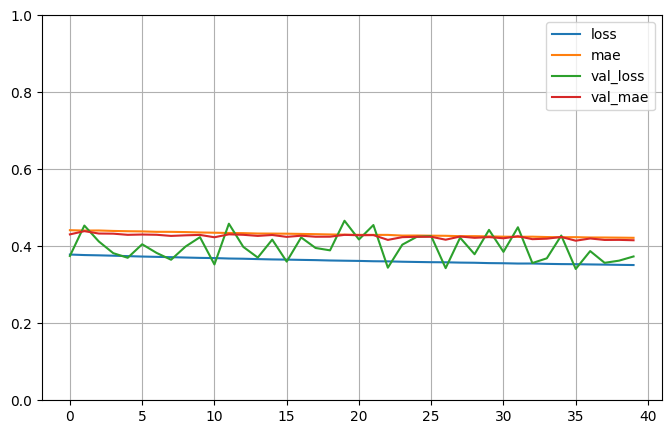

In [23]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [ ]:
%pwd

# Saving and Restoring

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
model_path = "/content/drive/My Drive/Colab Notebooks/Data/model.h5"
model.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
del model

In [66]:
keras.backend.clear_session()

In [67]:
model = keras.models.load_model(model_path)

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [69]:
y_pred = model.predict(X_new)
print (y_pred)

1/1 [==============================] - 0s 112ms/step
[[0.9125289]
 [1.8169329]
 [3.8738406]]


# Using Callbacks during Training

In [70]:
del model
keras.backend.clear_session()

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [73]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Data/model-{epoch:02d}.h5")

In [74]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8155 - val_loss: 3.0482
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4857 - val_loss: 11.0015
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4939 - val_loss: 0.3968
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3863 - val_loss: 0.3526
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3761 - val_loss: 0.3497
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3688 - val_loss: 0.3723
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3688 - val_loss: 0.3502
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3589 - val_loss: 0.3597
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3537 - val_loss: 0.3545
Epoch 10/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3504 - val_loss: 0.357

In [75]:
del model
keras.backend.clear_session()

In [76]:
model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Data/model-10.h5")

In [77]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)

1/1 [==============================] - 0s 117ms/step - loss: 0.3441


In [ ]:
print (mse_test)

In [ ]:
model.metrics_names

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_diff=y_pred-y_test

In [ ]:
y_pred.shape

In [ ]:
mse = (y_diff^2)

### Best Model Only

In [78]:
del model
keras.backend.clear_session()

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [81]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Data/Best_Model.h5", save_best_only=True)

In [82]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8973 - val_loss: 1.1004
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7769 - val_loss: 0.6811
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6642 - val_loss: 0.5797
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5926 - val_loss: 0.5287
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5449 - val_loss: 0.4859
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5084 - val_loss: 0.4560
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4826 - val_loss: 0.4331
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4621 - val_loss: 0.4156
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4465 - val_loss: 0.4023
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4346 - val_loss: 0.3938

In [83]:
model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Data/Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4326


### Early stop - Best Model Only

In [84]:
del model
keras.backend.clear_session()

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [86]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [87]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Data/early_stop_model.h5", save_best_only=True)

In [88]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#     patience: Number of epochs with no improvement after which training will be stopped.

In [89]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 3ms/step - loss: 2.0102 - val_loss: 0.8272
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7720 - val_loss: 1.1485
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.7037 - val_loss: 0.6455
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6449 - val_loss: 0.6063
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6050 - val_loss: 0.5897
Epoch 6/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5675 - val_loss: 0.7268
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5404 - val_loss: 0.5215
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5138 - val_loss: 0.4849
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4922 - val_loss: 0.5431
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4751 - val_lo

In [90]:
model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Data/early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.4015
